<a href="https://colab.research.google.com/github/Thanishka3/zetz1/blob/main/toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded Excel file
toyota= pd.read_csv(file_name)

Saving toyota_csv to toyota_csv (1)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

In [2]:
print(toyota.tail())

        Id                                              Model  Price  \
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type     HP  Met_Color  ...  \
1431         69         12      1998  20544    Petrol   86.0          1  ...   
1432         72          9      1998  19000    Petrol   86.0          0  ...   
1433         71         10      1998  17016    Petrol   86.0          0  ...   
1434         70         11      1998  16916    Petrol   86.0          1  ...   
1435         76          5      1998      1    Petrol  110.0          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
1431          

In [3]:
toyota.shape

(1436, 38)

In [4]:
print(toyota.tail(50))

        Id                                              Model  Price  \
1386  1393  TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...   9750   
1387  1394        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   7450   
1388  1395                 TOYOTA Corolla 1.6 LL HB 4/5-Doors   8750   
1389  1396  TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...   8750   
1390  1397  TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA AUT4 ...   8500   
1391  1398  TOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-D...   8950   
1392  1399  TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-D...   7500   
1393  1400  TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-D...   7250   
1394  1401  TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-D...   7450   
1395  1402       TOYOTA Corolla 1.3 HB LINEA TERRA AUT Anders   8750   
1396  1403  TOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-D...   9800   
1397  1404  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7500   
1398  1405  TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors   

In [5]:
toyota.info

<bound method DataFrame.info of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type     HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90.0          1  ...   
1            23         10      2002  72937    Diesel   90.0          1  ...   
2            24          9      2002  41711    Diesel   90.0          1  ...   
3            26          7      2002  48000    Diesel   90.0          0  ...   
4            30          3      2002  38500    Diesel   90.0          0  ...   
...         ...        ...       ...    ...       ...    ...        ...  ...   
1431         69         12      1998  20544    Petrol   86.0          1  ...   
1432         72          9      1998  19000    Petrol   86.0          0  ...   
1433         71         10      1998  17016    Petrol   86.0          0  ...   
1434         70         11      1998  16916    Petrol   86.0          1  ...   
1435         76          5      1998      1    Petrol  110.0          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]>

In [6]:
print(toyota.head())

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type    HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90.0          1  ...            1   
1         10      2002  72937    Diesel  90.0          1  ...            1   
2          9      2002  41711    Diesel  90.0          1  ...            0   
3          7      2002  48000    Diesel  90.0          0  ...            0   
4          3      2002  38500    Diesel  90.0          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0          

In [8]:
toyota.corr

<bound method DataFrame.corr of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type     HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90.0          1  ...   
1            23         10      2002  72937    Diesel   90.0          1  ...   
2            24          9      2002  41711    Diesel   90.0          1  ...   
3            26          7      2002  48000    Diesel   90.0          0  ...   
4            30          3      2002  38500    Diesel   90.0          0  ...   
...         ...        ...       ...    ...       ...    ...        ...  ...   
1431         69         12      1998  20544    Petrol   86.0          1  ...   
1432         72          9      1998  19000    Petrol   86.0          0  ...   
1433         71         10      1998  17016    Petrol   86.0          0  ...   
1434         70         11      1998  16916    Petrol   86.0          1  ...   
1435         76          5      1998      1    Petrol  110.0          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]>

In [14]:
toyota.isnull()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
sns.pairplot(toyota)
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'Mfg_Month'}>,
        <Axes: title={'center': 'Mfg_Year'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Met_Color'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Quarterly_Tax'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Mfr_Guarantee'}>,
        <Axes: title={'center': 'BOVAG_Guarantee'}>,
        <Axes: title={'center': 'Guarantee_Period'}>],
       [<Axes: title={'center': 'ABS'}>,
        <Axes: title={'center': 'Airbag_1'}>,
        <Axes: title={'center': 'Airbag_2'}>,
        <Axes: title={'center': 'Airco'}>

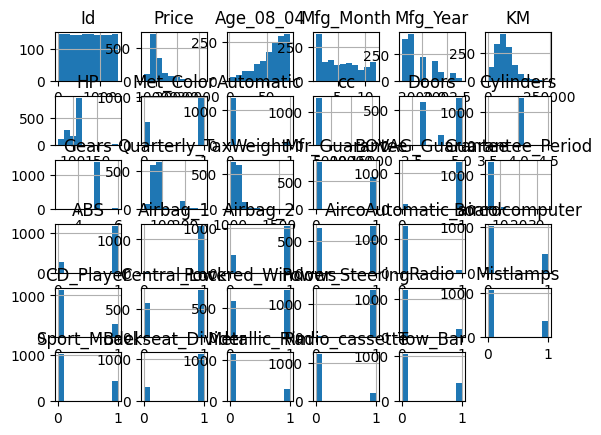

In [17]:
toyota.hist()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
model = smf.ols('Mfg_Month ~ KM + Price + Mfg_Year + HP', data=toyota).fit()


In [25]:
model.params

,0
Intercept,1018.727213
KM,-0.000006
Price,0.000166
Mfg_Year,-0.506475
HP,-0.017759


In [26]:
print(model.tvalues, '\n', model.pvalues)

Intercept    4.006116
KM          -1.941371
Price        2.873716
Mfg_Year    -3.977326
HP          -2.710482
dtype: float64 
 Intercept    0.000065
KM           0.052410
Price        0.004117
Mfg_Year     0.000073
HP           0.006799
dtype: float64


In [27]:
(model.rsquared,model.rsquared_adj)

(0.01458643797061654, 0.011828107496076656)

In [30]:
ml_v=smf.ols('Mfg_Month~HP',data = toyota).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    10.661204
HP           -1.516680
dtype: float64 
 Intercept    1.368526e-25
HP           1.295681e-01
dtype: float64


In [31]:
ml_w=smf.ols('Mfg_Month~KM',data = toyota).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    30.769648
KM           -0.781383
dtype: float64 
 Intercept    4.597728e-160
KM            4.347061e-01
dtype: float64
